## Visualizing the Data:  NYC Rolling Sales

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('../nyc-rolling-sales.csv')

In [10]:
data = data.drop('Unnamed: 0', 1)
data = data.replace(' -  ', np.nan) # empty data points are not set up properly
data = data.replace(' ', np.nan)
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,NaN,...,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,NaN,...,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,NaN,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,NaN,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,NaN,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,NaN,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [11]:
data.drop_duplicates(inplace=True)

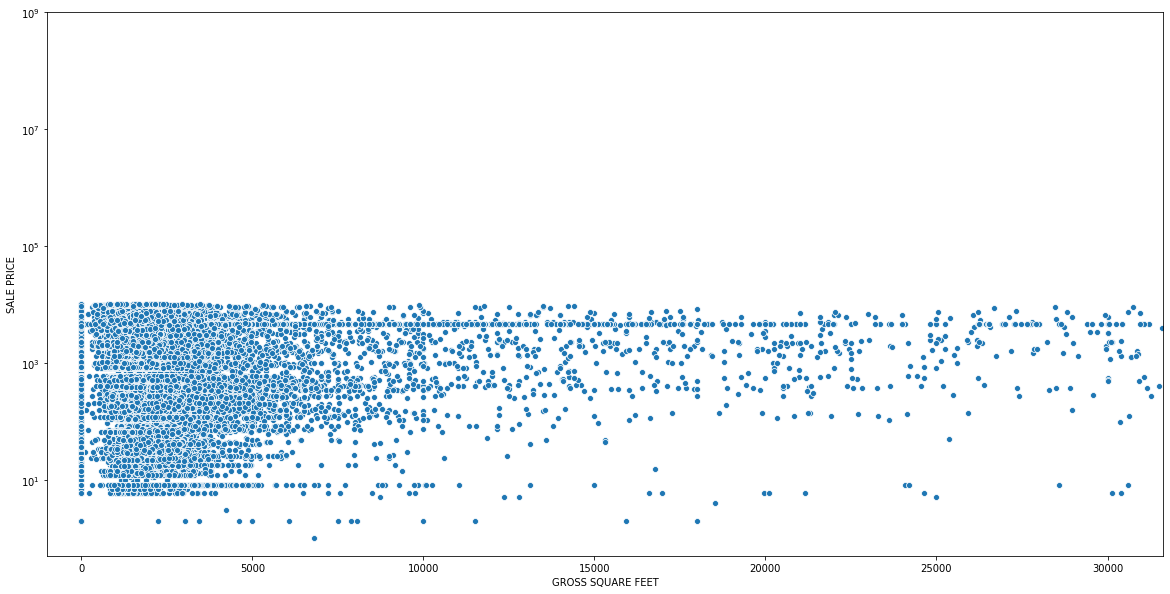

In [17]:
#Price against Gross Square Feet

data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(0).astype('int')
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots()
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data)
ax.set_xlim([-10**3, 10**4.5])
ax.set_ylim([.5, 10**9])
ax.set_yscale("log")
plt.show()

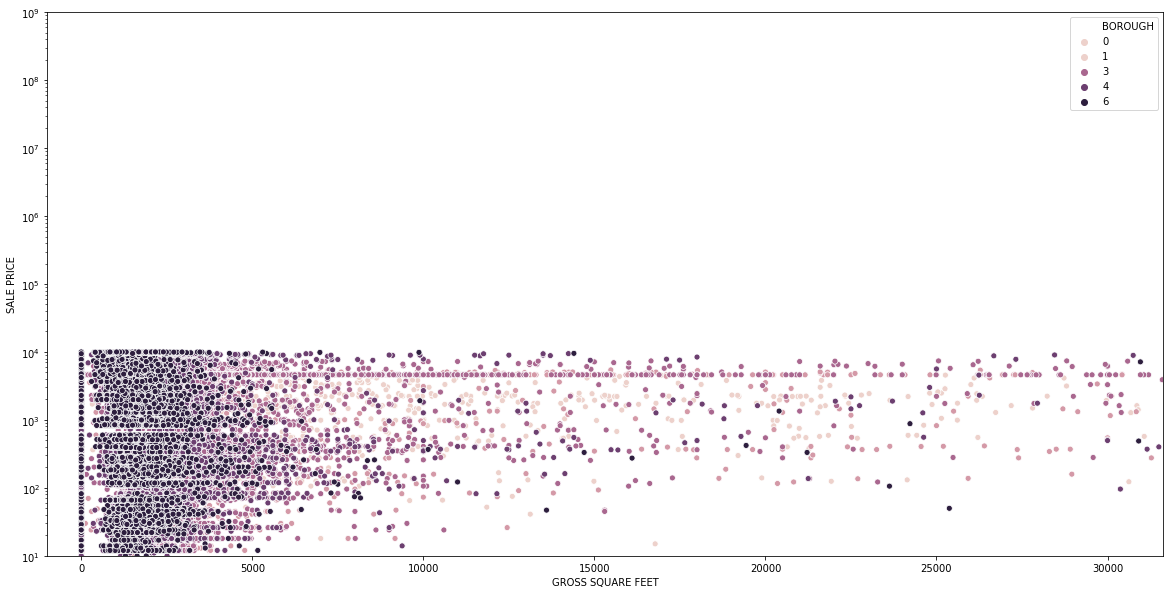

In [21]:
#Since borough is a category we can use different color for each

fig, ax = plt.subplots()
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, hue='BOROUGH')
ax.set_xlim([-10**3, 10**4.5])
ax.set_ylim([10**1, 10**9])
ax.set_yscale("log")
plt.show()

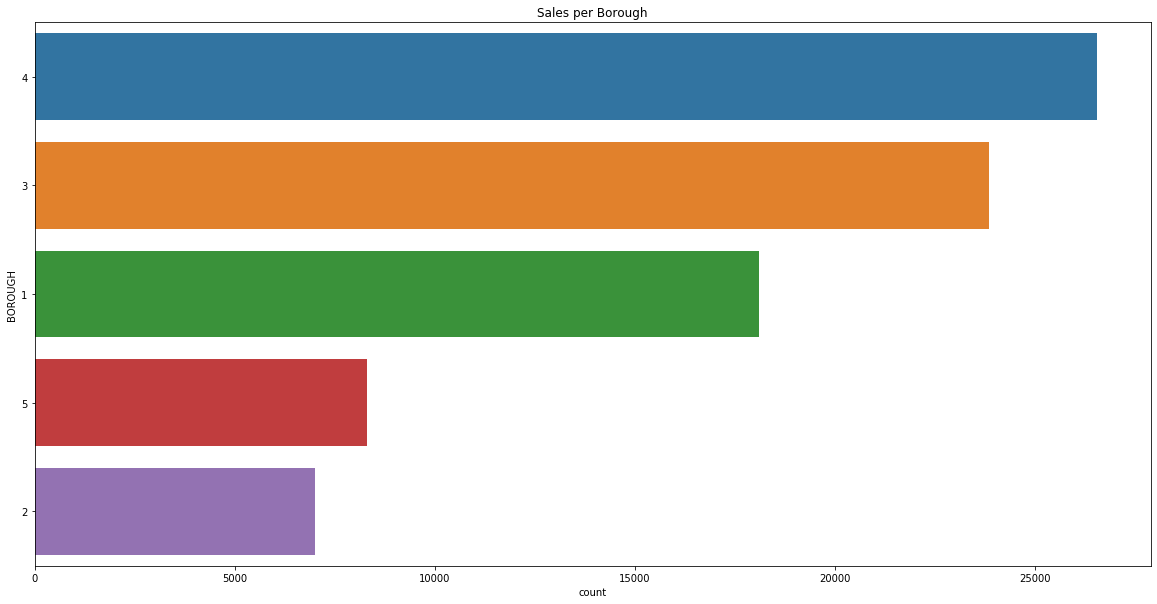

In [41]:
#Sales per Borough
sns.countplot(y = 'BOROUGH',
              data = data,
              order = data['BOROUGH'].value_counts().index)
plt.title('Sales per Borough')
plt.show()

Text(0.5, 1.0, 'Sales per borough_Residential')

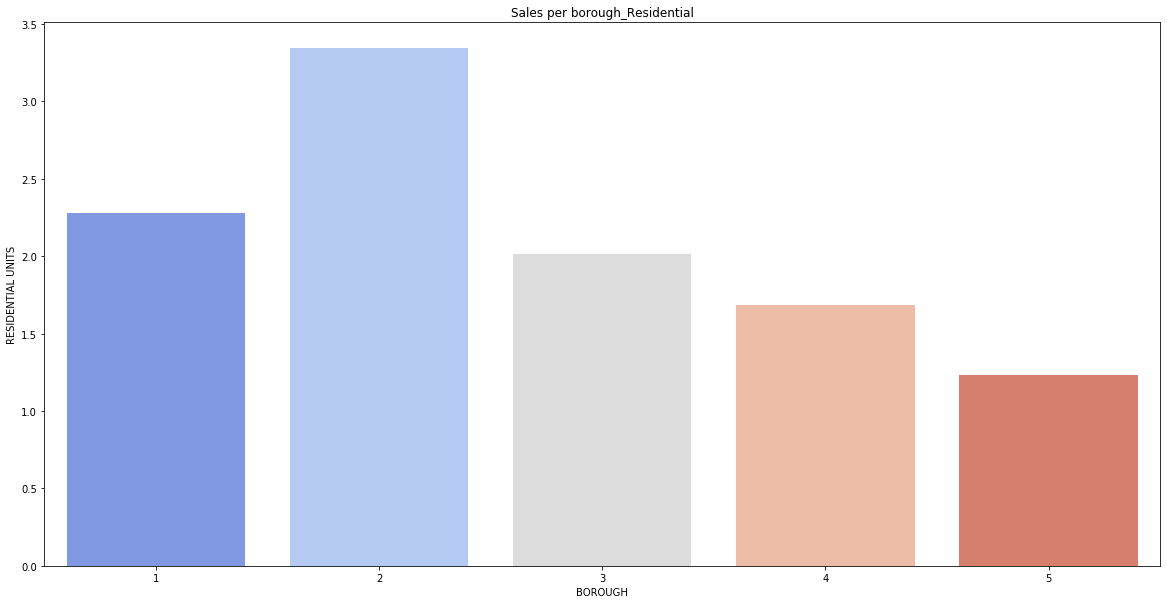

In [42]:
#Sales per borough_Residential
sns.barplot(y='RESIDENTIAL UNITS', x='BOROUGH',data=data, palette='coolwarm', ci=None)
plt.title('Sales per borough_Residential')

Text(0.5, 1.0, 'Sales per borough_Commercial')

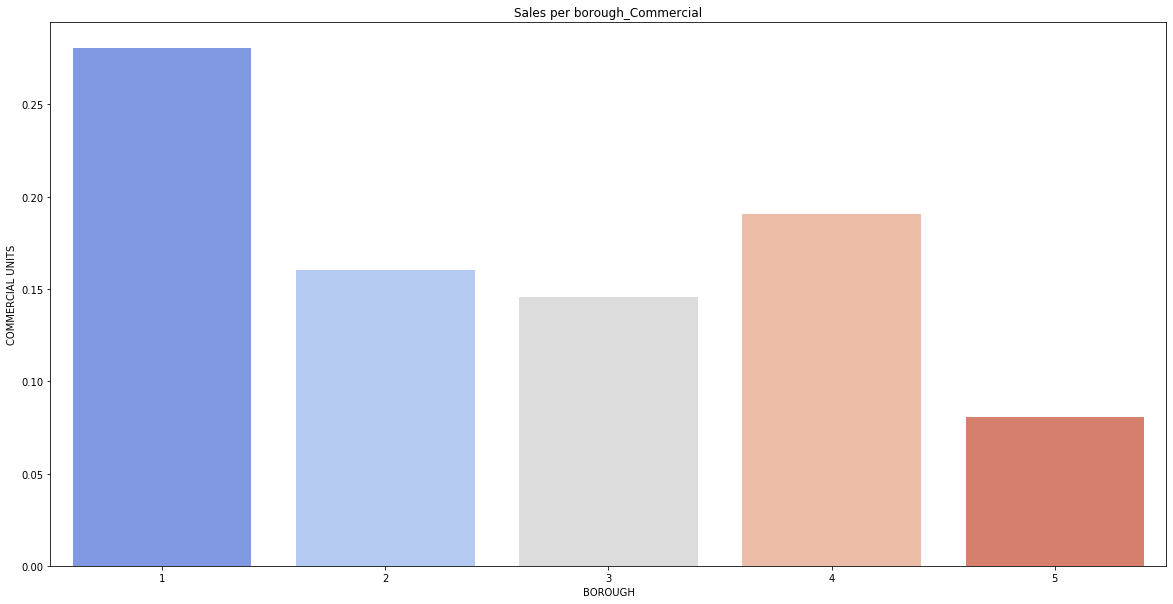

In [44]:
#Sales per borough_Commercial
sns.barplot(y='COMMERCIAL UNITS', x='BOROUGH',data=data, palette='coolwarm', ci=None)
plt.title('Sales per borough_Commercial')

In [23]:
data['NEIGHBORHOOD'].value_counts()

FLUSHING-NORTH              3058
UPPER EAST SIDE (59-79)     1729
UPPER EAST SIDE (79-96)     1582
BEDFORD STUYVESANT          1429
UPPER WEST SIDE (59-79)     1415
                            ... 
FRESH KILLS                    2
CITY ISLAND-PELHAM STRIP       1
BRONX PARK                     1
PELHAM BAY                     1
EAST RIVER                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

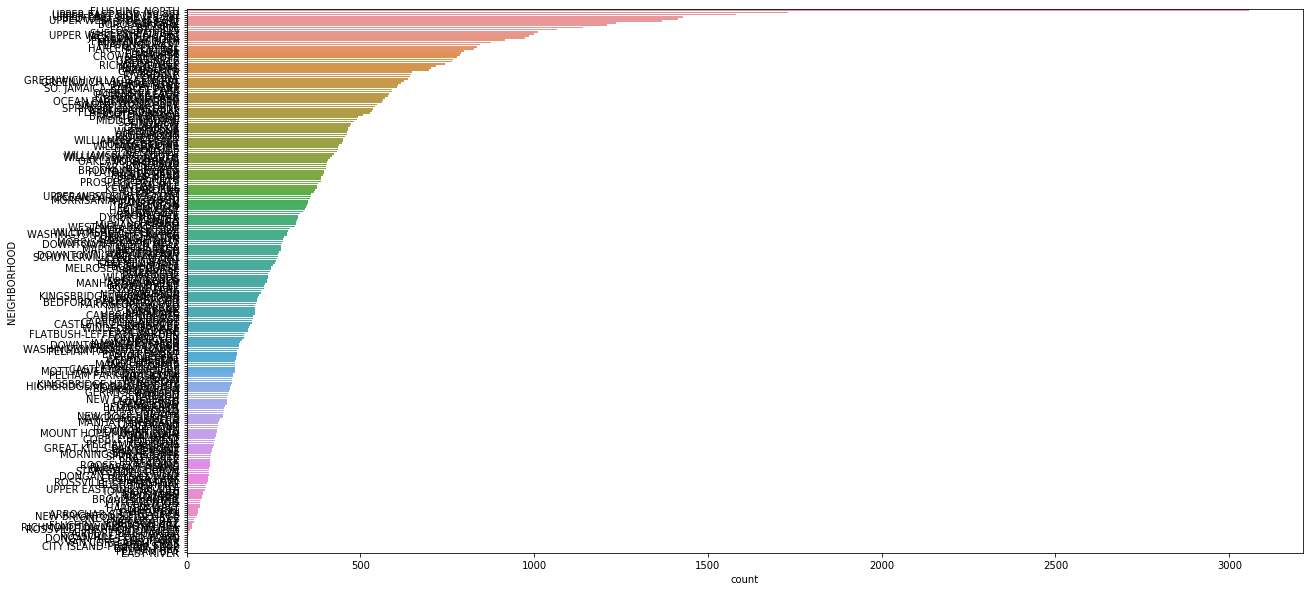

In [24]:
sns.countplot(y = 'NEIGHBORHOOD',
              data = data,
              order = data['NEIGHBORHOOD'].value_counts().index)
plt.show()

In [25]:
data['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                         18107
02 TWO FAMILY DWELLINGS                         15700
13 CONDOS - ELEVATOR APARTMENTS                 12929
10 COOPS - ELEVATOR APARTMENTS                  12876
03 THREE FAMILY DWELLINGS                        4342
07 RENTALS - WALKUP APARTMENTS                   3395
09 COOPS - WALKUP APARTMENTS                     2764
04 TAX CLASS 1 CONDOS                            1652
44 CONDO PARKING                                 1437
15 CONDOS - 2-10 UNIT RESIDENTIAL                1274
05 TAX CLASS 1 VACANT LAND                       1221
17 CONDO COOPS                                   1199
22 STORE BUILDINGS                                918
12 CONDOS - WALKUP APARTMENTS                     871
14 RENTALS - 4-10 UNIT                            662
29 COMMERCIAL GARAGES                             578
43 CONDO OFFICE BUILDINGS                         466
31 COMMERCIAL VACANT LAND                         442
47 CONDO NON-BUSINESS STORAG

In [32]:
#SALE DATE should be datetime
data['SALE DATE']    = pd.to_datetime(data['SALE DATE'], errors='coerce')
data['sale year']    = data['SALE DATE'].dt.year
data['sale month']   = data['SALE DATE'].dt.month
data['sale quarter'] = data['SALE DATE'].dt.quarter
data['sale day']     = data['SALE DATE'].dt.day
data['sale weekday'] = data['SALE DATE'].dt.weekday

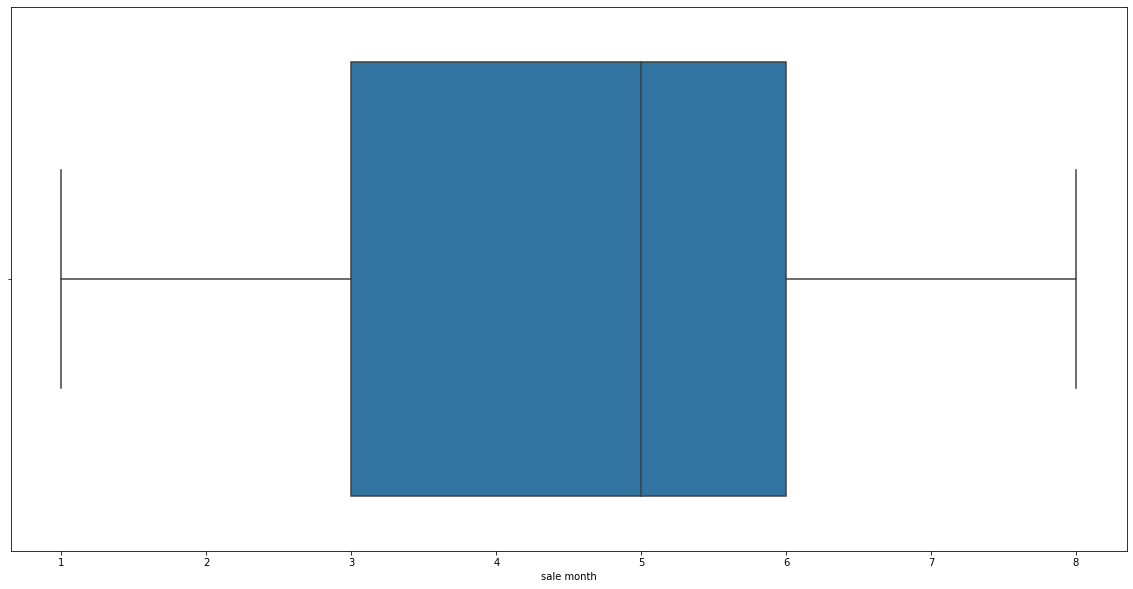

In [58]:
#Sale months for 2017
sns.boxplot(x='sale month', data=data[data['sale year']==2017])

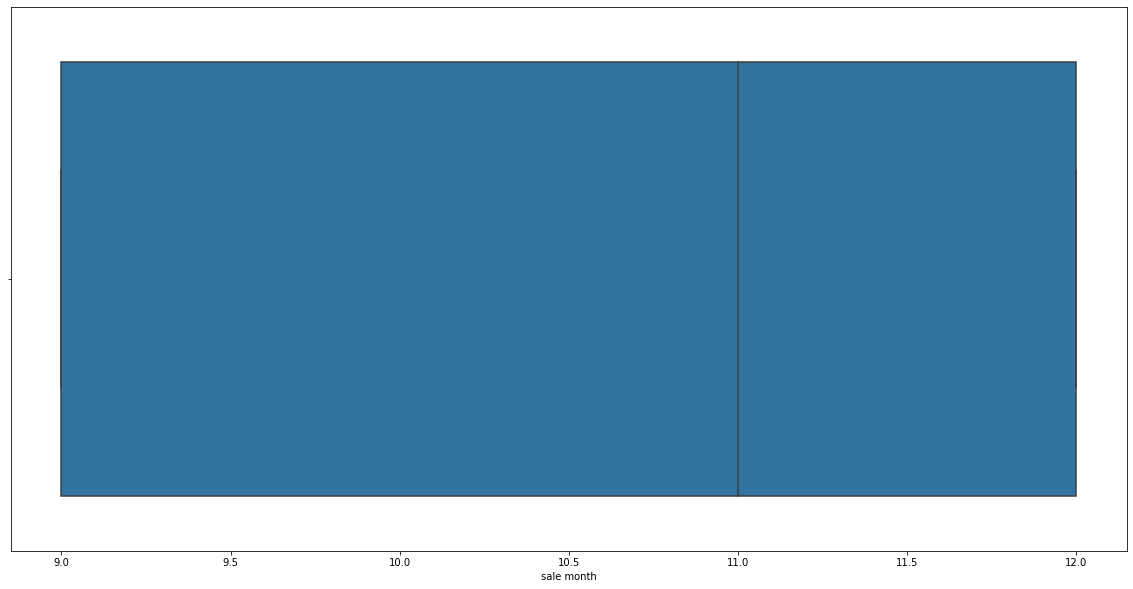

In [38]:
#Sale months for 2016
sns.boxplot(x='sale month', data=data[data['sale year']==2016])

Text(0.5, 1.0, 'Sales 2016 VS 2017')

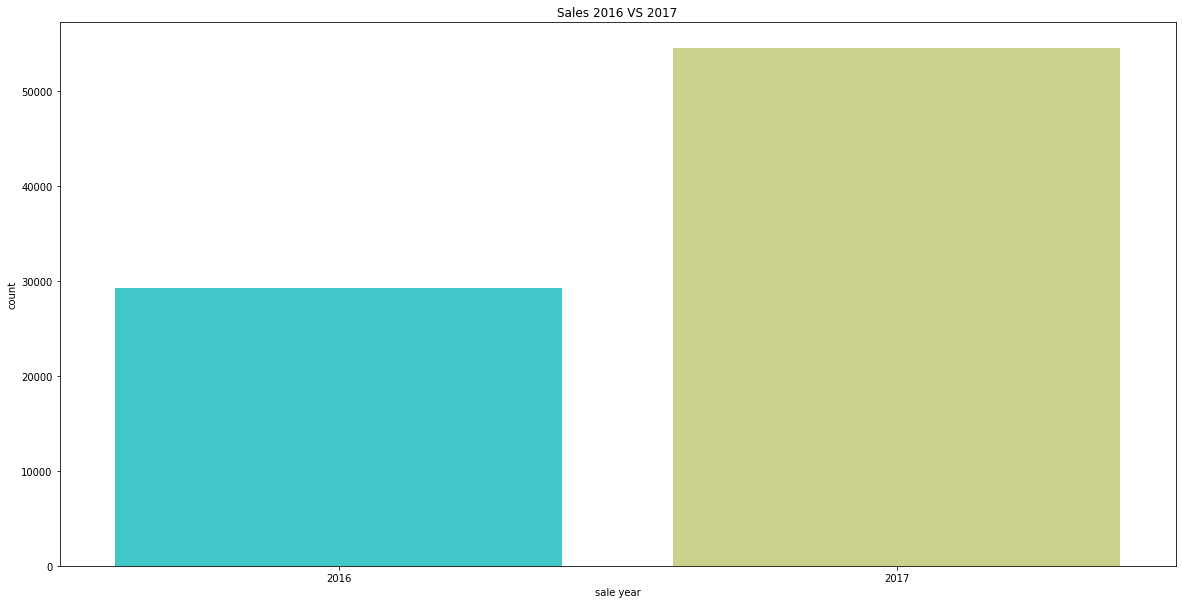

In [48]:
#Sales Compararison
sns.countplot(x='sale year', data=data, palette='rainbow')
plt.title('Sales 2016 VS 2017')

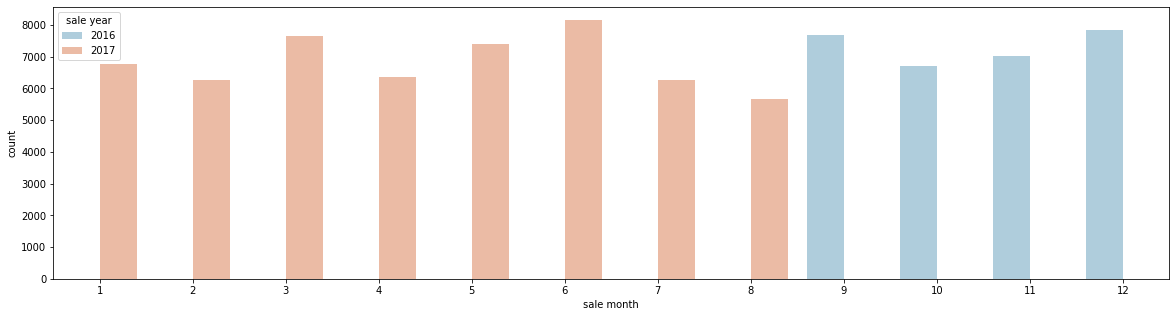

In [55]:
#Count of Sales in each month
plt.figure(figsize=(20,5))
sns.countplot('sale month', hue='sale year', data=data, palette='RdBu_r')

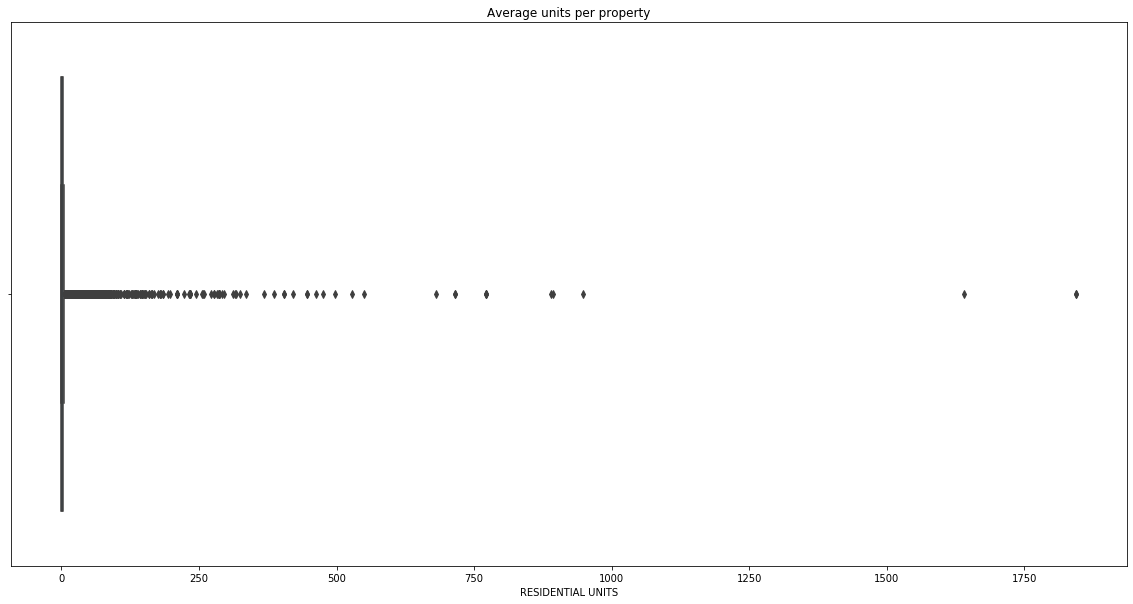

In [73]:
#Average units per property
sns.boxplot(x='RESIDENTIAL UNITS',data=data)
plt.title('Average units per property')
plt.show()